In [2]:
import sys
import keras
import tensorflow as tf
import platform
import sys
print(sys.version)

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
gpu = len(tf.config.list_physical_devices("GPU")) > 0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

3.10.13 (main, Sep 11 2023, 08:16:02) [Clang 14.0.6 ]
Python Platform: macOS-15.5-arm64-arm-64bit
Tensor Flow Version: 2.16.2
Keras Version: 3.10.0
GPU is available


In [2]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.8.0.dev20250609
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [3]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

In [ ]:
import pandas as pd
import tensorflow as tf
from keras import layers, models
import numpy as np
import PIL.Image as Image
import random
import matplotlib.pyplot as plt
from pathlib import Path

# **Parameter-Einstellungen**
CSV_FILE = "../data/image_data_rel.csv"
ORIGINAL_IMG_SIZE = (256, 256)  # Originalbildgröße
TARGET_IMG_SIZE = (256, 256)  # Zielgröße nach Resize
IMAGES_PER_LABEL = 20  # Anzahl Bilder pro Label
EPOCHS = 10  # Anzahl der Trainings-Epochen
BATCH_SIZE = 20  # Batch-Size fürs Training
VALIDATION_SPLIT = 0.2  # Anteil der Daten für Validierung

# **GPU auswählen**
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

# **CSV-Datei einlesen**
df = pd.read_csv(CSV_FILE)

# **Labels in numerische Werte umwandeln**
labels = sorted(df["label"].unique())  
label_map = {label: idx for idx, label in enumerate(labels)}

# **Daten vorbereiten**
X = []
y = []

project_root = Path().resolve()

for label in labels:
    images = df[df["label"] == label]["url"].tolist()
    
    # Genau `IMAGES_PER_LABEL` Bilder pro Label auswählen (falls weniger vorhanden, alle nehmen)
    selected_images = random.sample(images, min(len(images), IMAGES_PER_LABEL))
    
    for rel_path in selected_images:
        image_path = project_root / rel_path
        
        try:
            img = Image.open(image_path).convert("RGB")  
            img = img.resize(TARGET_IMG_SIZE)  # **Resize auf 80x80**
            img_array = np.array(img) / 255.0  # Skalierung auf [0,1]
            
            X.append(img_array)
            y.append(label_map[label])  
        
        except Exception as e:
            print(f"Fehler beim Laden von {image_path}: {e}")

# **In NumPy-Arrays umwandeln**
X = np.array(X)
y = np.array(y)


/opt/anaconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-09 15:32:23.233139: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-09 15:32:23.233183: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-09 15:32:23.233190: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-09 15:32:23.233212: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-09 15:32:23.233230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    50,331,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,366,735 (192.13 MB)

 Trainable params: 50,366,735 (192.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-06-09 15:32:23.607378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.0393 - loss: 270.5559 - val_accuracy: 0.0000e+00 - val_loss: 1854.9790
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.1042 - loss: 372.2391 - val_accuracy: 0.0000e+00 - val_loss: 2081.2751
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.1075 - loss: 342.4911 - val_accuracy: 0.0000e+00 - val_loss: 2074.9346
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0953 - loss: 181.9888 - val_accuracy: 0.0000e+00 - val_loss: 1946.1185
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1674 - loss: 123.1456 - val_accuracy: 0.0000e+00 - val_loss: 1826.8856
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1626 - loss: 116.8228 - val_accuracy: 0.0000e+00 - val_loss: 1701.2982
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1683 - loss: 92.7682 - val_accuracy: 0.0000e+00 - val_loss: 1680.2534
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accurac

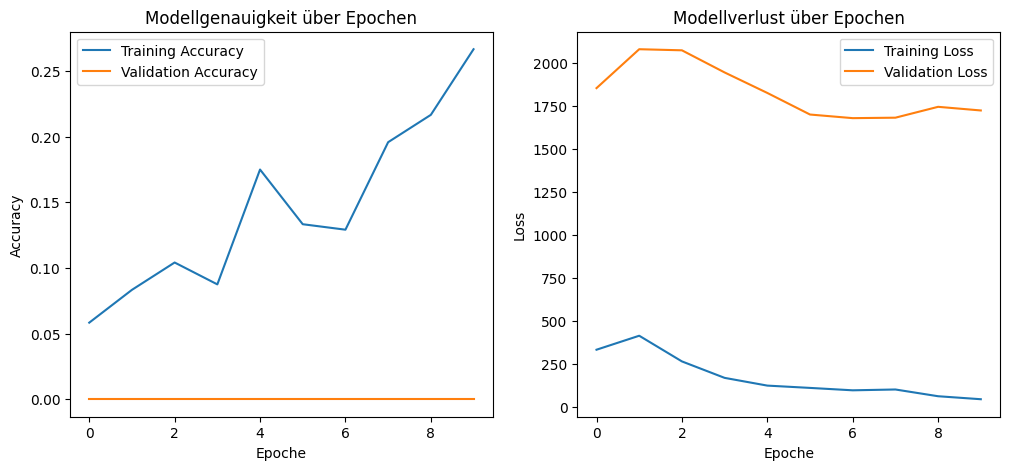

In [11]:
# **Deep Learning Modell mit zwei Hidden Layers**
model = models.Sequential([
    layers.Flatten(input_shape=(TARGET_IMG_SIZE[0], TARGET_IMG_SIZE[1], 3)),  
    layers.Dense(256, activation="relu"),  
    layers.Dense(128, activation="relu"),  
    layers.Dense(len(labels), activation="softmax")  
])

# **Modell zusammenfassen**
model.summary()

# **Modell kompilieren**
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# **Modell trainieren**
history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

# **Trainingsverlauf visualisieren**
plt.figure(figsize=(12, 5))

# **Genauigkeit (Accuracy)**
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.title("Modellgenauigkeit über Epochen")
plt.legend()

# **Verlust (Loss)**
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.title("Modellverlust über Epochen")
plt.legend()

plt.show()